<img src="./img/nomiente.png" />

# Laboratorio #2 

# Jhon Jaime Gil Sepulveda - Nelson Javier Posada Flórez

1. En un notebook de jupyter, construir un método para cada una de las siguientes operaciones (transformaciones) morfológicas, trabajadas en clase: Dilatación, Erosión, Apertura, Cierre y Extracción de Bordes. (No se puede hacer uso de ninguna librería para llamar métodos que realicen estas operaciones, debe ser un desarrollo propio de cada grupo de trabajo)

2. Tomar una imagen (puede ser alguna de las que ya hemos trabajado en el curso), y aplicarle la extracción de bordes con el método construido para ese fin en el punto anterior. Se debe mostrar la imagen original y el resultado de la extracción de los bordes de la misma. 

- Nota importante: La imagen que usen debe tener el origen en (0,0).
- Deben usar el siguiente elemento estructural (ee) que tiene origen en (1,1):

$\begin{pmatrix}
0 & 1 & 1 \\
1 & .1 & 1 \\
0 & 1 & 0
\end{pmatrix}$

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
from skimage import io, feature
from skimage.color import rgb2gray
%matplotlib inline

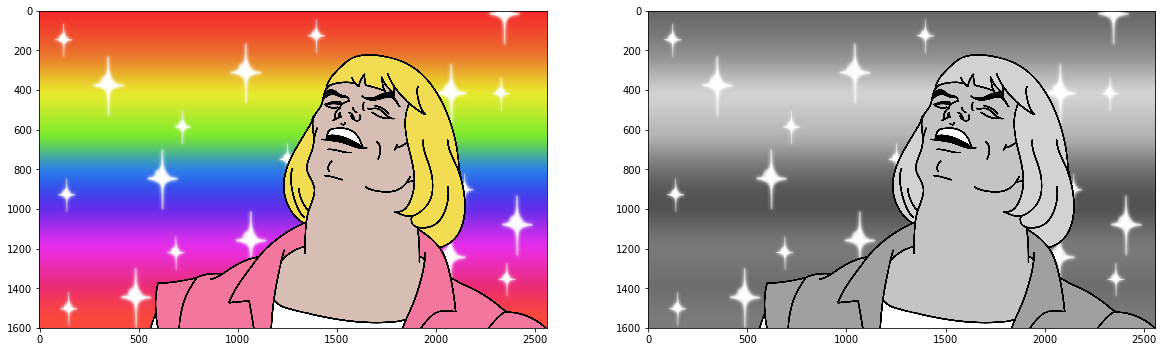

In [57]:
ee = np.asarray([[0,1,0],[1,1,1],[0,1,0]])
origen = np.asarray([1,1])
img = Image.open('./img/main.jpg')
img_gris = img.convert('L')

plt.show()
fig = plt.figure()
fig.set_figheight(20)
fig.set_figwidth(20)
ax1 = fig.add_subplot(121)
ax1.imshow(np.asarray(img), cmap='gray')
ax2 = fig.add_subplot(122)
ax2.imshow(img_gris, cmap='gray')

In [58]:
"""
Obtiene la cantidad de filas y columnas de una matriz
"""
def limites(matrix):
    return np.size(matrix, 0), np.size(matrix, 1)

"""
Convierte una imagen en escala de grises a binaria.
Dandole valor de 255 si está en el intervalo del umbral
Además puede hacer el inverso de esta
"""
def umbral_intervalo(img, u1, u2, invertido=False):
    filas = np.size(img,0)
    columnas = np.size(img,1)
    new_Img = np.zeros((filas,columnas))
    for i in range(0,filas):
        for j in range(0, columnas):
            if (img[i,j] > u1) and (img[i,j] < u2):
                if invertido == True:
                    new_Img[i,j] = 255
                else:
                    new_Img[i,j] = 0
            elif (img[i,j] <= u1) or (img[i,j] >= u2):
                if invertido == True:
                    new_Img[i,j] = 0
                else:
                    new_Img[i,j] = 255
    return new_Img

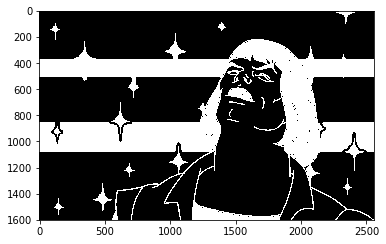

In [61]:
Img = umbral_intervalo(np.asarray(img_gris), 100, 200)
plt.imshow(Img, cmap='gray')

In [62]:
"""
Obtiene una nueva matriz con los valores del
elementro estructural en su origen
"""
def procesar_elemento_estructural(matrix, x, y):
    nuevo_array = []
    for i in matrix:
        nuevo_array.append([i[0]-x, i[1]-y])
    return nuevo_array

"""
Obtiene el valores de la posición de los pixeles
que son blancos
"""
def obtener_index(matrix):
    filas, columnas = limites(matrix)
    
    indices = []
    
    for i in range(filas):
        for j in range(columnas):
            if (matrix[i,j] != 0):
                indices.append([i,j])
    return indices

"""
Hace un figura con 3 imagenes
Normalmente se utilizará mostrar la imagen
Origina, imagen procesada y imagen procesada con OpenCV
"""
def plot_imagenes(img1, img2, img3):
    fig = plt.figure()
    fig.set_figheight(20)
    fig.set_figwidth(20)

    ax1 = fig.add_subplot(131)
    ax1.imshow(img1, cmap='gray')

    ax2 = fig.add_subplot(132)
    ax2.imshow(img2, cmap='gray')

    ax3 = fig.add_subplot(133)
    ax3.imshow(img3, cmap='gray')

In [20]:
"""
Recorre los pixeles en donde hay blanco y alrededor de este
agrega más pixeles blancos
"""
def dilatacion(matrix, x, S):
    filas, columnas = limites(matrix)
    
    nueva_imagen = np.zeros((filas, columnas))
    for i in x:
        for j in S:
            nueva_coordenada = [i[0]+j[0], i[1]+j[1]]
            if ((nueva_coordenada[0] <= filas -1) and (nueva_coordenada[1] <= columnas - 1)):
                nueva_imagen[nueva_coordenada[0], nueva_coordenada[1]] = 255
    return nueva_imagen

"""
Recorre los pixeles en donde hay blanco, mira si alrededor de estos
hay pixeles negros, si los hay los hace blancos
"""
def erosion(matrix, x, S):
    filas, columnas = limites(matrix)
    
    nueva_imagen = np.zeros((filas, columnas))
    for i in x:
        hit = False
        for j in S:
            nueva_coordenada = [i[0]+j[0], i[1]+j[1]]
            if ((nueva_coordenada[0] <= filas -1) and (nueva_coordenada[1] <= columnas - 1)):
                if (matrix[nueva_coordenada[0], nueva_coordenada[1]] == 0):
                    hit = True
                    break
        nueva_imagen[i[0], i[1]] = 255 if not hit else 0
    return nueva_imagen

In [50]:
# De nuestro elemento estructural, obtendremos los pixeles donde hay blancos y movemos la matriz al origen dado
S = procesar_elemento_estructural(obtener_index(ee), origen[0], origen[1])

# Obtenemos los indices de los pixeles blancos de nuestra imagen binaria
x = obtener_index(Img)

## ¡Importante!
- Hemos utilizado la librería OpenCV2 unica y exclusivamente para hacer una comparación de nuestros algoritmos con los de ellos
- También se utilizó la librería skimage para evaluar nuestros resultados con respecto a la extracción de bordes

# Dilatación

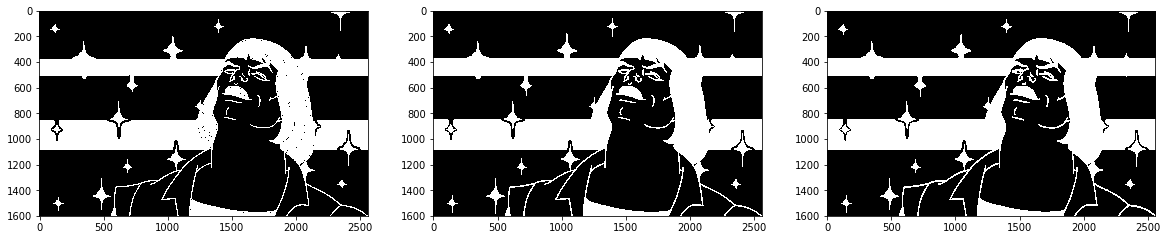

In [27]:
imagen_dilatada = dilatacion(Img, x, S)
imagen_dilatadacv2 = cv2.dilate(Img, np.asarray(S, dtype=np.uint8))
plot_imagenes(Img, imagen_dilatada, imagen_dilatadacv2)

# Erosión

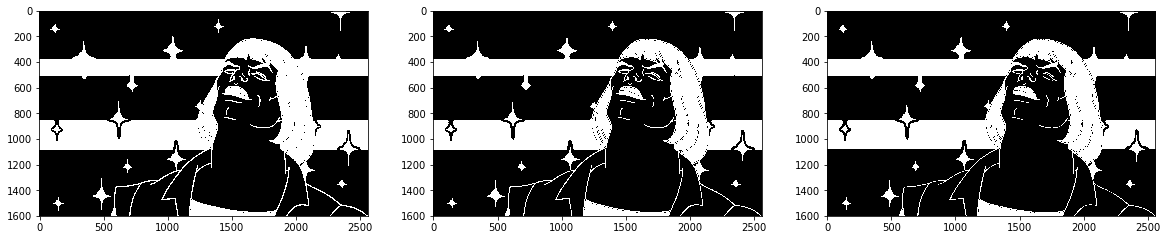

In [51]:
imagen_erosionada = erosion(Img, x, S)
imagen_erosionadacv2 = cv2.erode(Img, np.asarray(S, dtype=np.uint8))
plot_imagenes(Img, imagen_erosionada, imagen_erosionadacv2)

# Apertura

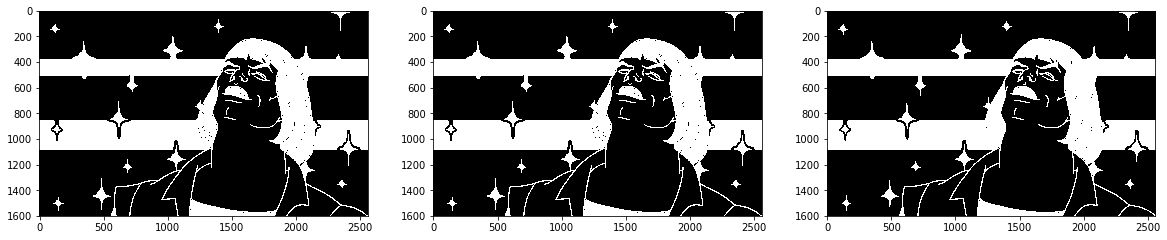

In [53]:
apertura = dilatacion(imagen_erosionada, obtener_index(imagen_erosionada), S)
aperturacv2 = cv2.dilate(imagen_erosionadacv2, np.asarray(S, dtype=np.uint8))
plot_imagenes(Img, apertura, aperturacv2)

# Cierre

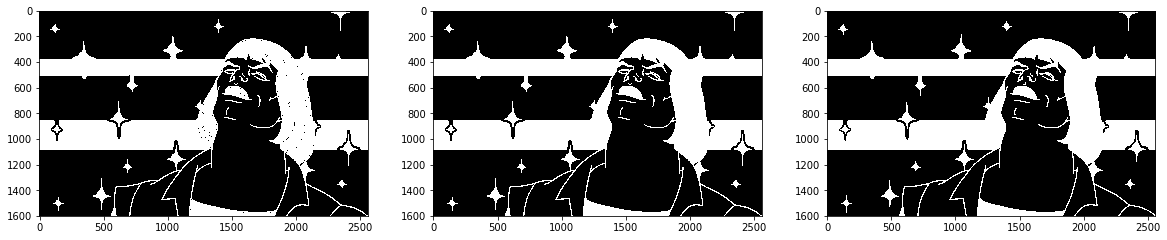

In [54]:
cierre = erosion(imagen_dilatada, obtener_index(imagen_dilatada), S)
cierrecv2 = cv2.erode(imagen_dilatadacv2, np.asarray(S, dtype=np.uint8))
plot_imagenes(Img, cierre, cierrecv2)

# Extracción de bordes

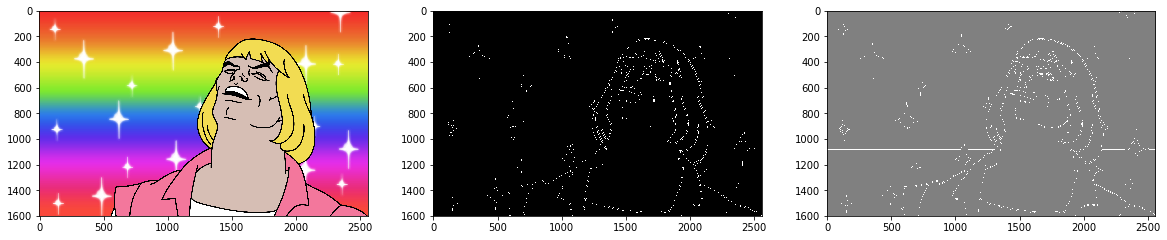

In [56]:
# En base a la teoría, la extracción de bordes sería el cierre menos la erosión
eb = cierre - imagen_erosionada
ebcv2 = cierrecv2 - imagen_erosionadacv2
plot_imagenes(np.asarray(img), eb, ebcv2)

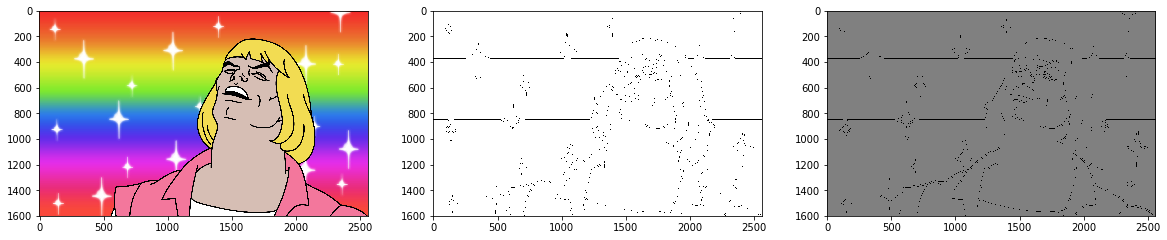

In [63]:
# Al revés
eb2 = apertura - imagen_dilatada
ebcv22 = aperturacv2 - imagen_dilatadacv2
plot_imagenes(np.asarray(img), eb2, ebcv22)

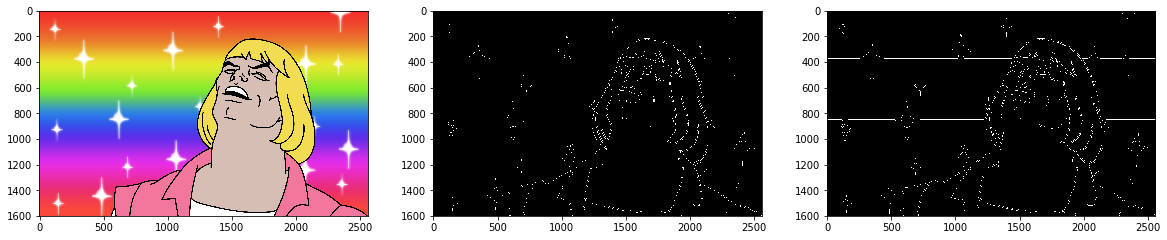

In [68]:
from skimage import io, feature
from skimage.color import rgb2gray
edges = feature.canny(Img)
plot_imagenes(img, eb, edges)